<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/J_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** Luiz Barboza

**Date:** 20/dec/22

**Title:** Data Visualization

**Lang:** Julia


# Julia Installation

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.3" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.3 on the current Colab Runtime...
2022-12-21 01:20:02 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.3-linux-x86_64.tar.gz [130030846/130030846] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


In [1]:
versioninfo()

Julia Version 1.8.3
Commit 0434deb161e (2022-11-14 20:14 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  LD_PRELOAD = /usr/lib/x86_64-linux-gnu/libtcmalloc.so.4
  JULIA_NUM_THREADS = 2


# Data Visualization

In [ ]:
import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Plots")

using CSV
using DataFrames
using Statistics
using Plots
#Ps. Plots on the version 1.38 is incompatible with GPUs

In [ ]:
import Pkg
Pkg.add("Plots")
using Plots

In [3]:
#gr()

Plots.GRBackend()

In [ ]:
;wget https://raw.githubusercontent.com/lcbjrrr/data/main/grades%20-%20okk.csv

In [ ]:
;wget https://raw.githubusercontent.com/lcbjrrr/quant/master/covid19%20-%20cases.csv

In [7]:
#read csv: grades
grades=CSV.read("grades - okk.csv", DataFrame)
print(grades)

12×7 DataFrame
 Row │ Course   Student  AP1      AP2      AP3      Grade    Score   
     │ String3  String7  Float64  Float64  Float64  Float64  String1 
─────┼───────────────────────────────────────────────────────────────
   1 │ ADM      João         9.0      8.0      9.0      8.6  B
   2 │ ADM      Maria        6.0      4.0     10.0      6.0  D
   3 │ LAW      José         4.0      3.0      4.0      3.6  F
   4 │ LAW      Pedro        8.0     10.0      7.0      8.6  B
   5 │ ECO      Paulo        7.5      8.0      9.5      8.1  B
   6 │ LAW      Esther       6.0      4.5      6.0      5.4  D
   7 │ ADM      Gabriel      8.0      6.0      8.0      7.2  B
   8 │ LAW      Rafael       7.5     10.0      9.5      8.9  B
   9 │ ECO      Davi         6.0     10.0      7.0      7.8  B
  10 │ LAW      Silvio      10.0      9.5      9.5      9.7  A
  11 │ ADM      Sofia        8.0      7.0      6.0      7.2  B
  12 │ ADM      Raquel       4.5      4.0      4.0      4.2  F

In [9]:
#read csv: covid
covid=CSV.read("covid19 - cases.csv", DataFrame)
first(covid,5)

Row,date,Brazil,India,US
,String15,Int64,Int64,Int64
1,1/23/20,0,0,0
2,1/24/20,0,0,1
3,1/25/20,0,0,0
4,1/26/20,0,0,3
5,1/27/20,0,0,0


## Line (Trends)

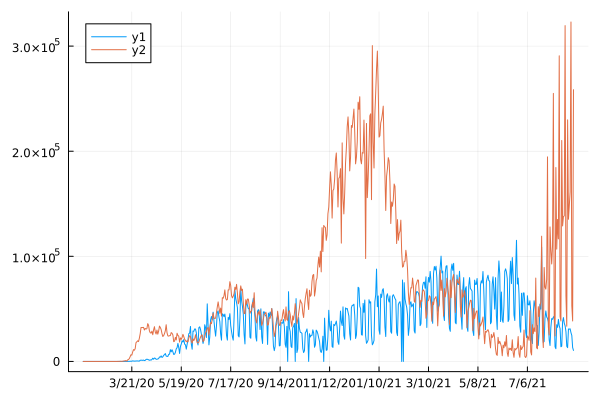

In [12]:
plot(covid.date, [covid.Brazil,covid.US])

## Bar (Comparison)

In [14]:
agvgrade_per_course = combine(groupby(grades, :Course), :Grade=> mean)
agvgrade_per_course

Row,Course,Grade_mean
,String3,Float64
1,ADM,6.64
2,LAW,7.24
3,ECO,7.95


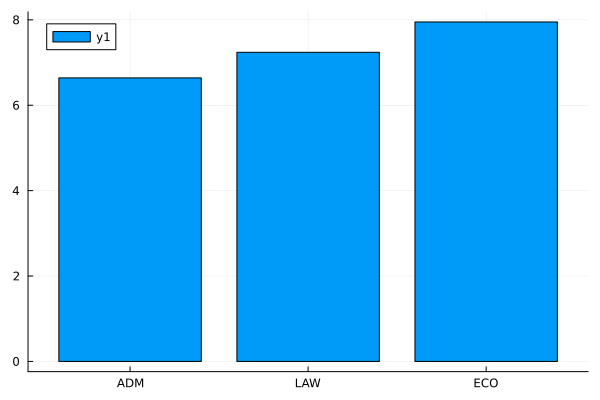

In [16]:
bar(agvgrade_per_course.Course, agvgrade_per_course.Grade_mean)

## Pie (Proportion)

In [48]:
students_per_course = combine(groupby(grades, :Course), :Student=> length)
students_per_course 

Row,Course,Student_length
,String3,Int64
1,ADM,5
2,LAW,5
3,ECO,2


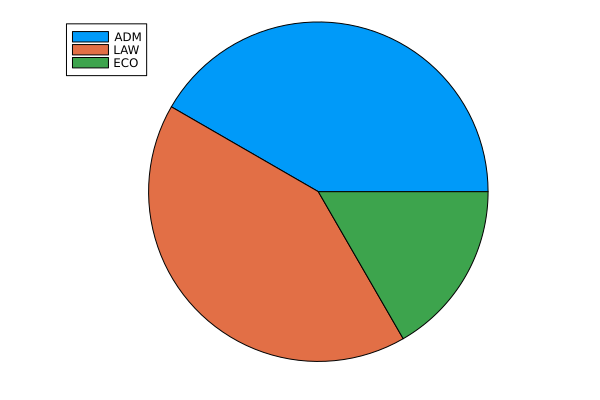

In [50]:
pie(students_per_course.Course, students_per_course.Student_length)